# Proyecto Final: Creación de base de datos, conexión y análisis utilizando herramientas de Python.

Universidad de Sonora
Maestría en Ciencia de Datos
Introducción a la Ciencia de Datos y sus Metodologías


Melissa Reyes Paz

Dr. Juan Pablo Soto Barrera

***

**Instrucciones.**

1. Crear una base de datos por medio del manejador MySql, SQLite, o PostgreSQL que se componga de una o varias tablas. 
2. Por medio de un Jupyter Notebook crear una conexión a la base de datos. Realizar una consulta a la base de datos desde el notebook.
3. Con los datos disponibles en el Notebook, crear una o más gráficas que representen la información descargada.
4. Documentar su trabajo en formato libre pero de manera comprensiva. (Se documentó el trabajo en este Notebook.)

***

## Descripción de la fuente de datos.

En este proyecto se hará uso de la información sobre crímenes cometidos en México, por entidad, de 2015 a agosto de 2022 disponibles en los [Datos abiertos de Incidencia delictiva (SESNSP)](https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva).

La tabla se compone de las columnas que se describen en el siguiente diccionario.

| Variable             | Etiqueta                                       | Descripción de la variable                                                               | Tipo de variable     |
|----------------------|------------------------------------------------|-----------------------------------------------------------------------------------------|----------------------|
| Año                 | Año                                         | Año de registro de las averiguaciones previas y/o carpetas de investigación.                                                  | Int               |
| Clave_Ent                  | Clave de la entidad                                           | Clave de la entidad, según el Marco Geoestadístico Nacional (MGN) del Instituto Nacional de Geografía y Estadística (INEGI).                                                    | Int  |
| Entidad                  | Entidad                                           | Entidad federativa de registro de las averiguaciones previas y/o carpetas de investigación.                                                    | String                  |
| Bien jurídico afectado       | Bien jurídico afectado                               | Primera clasificación de los delitos en las averiguaciones previas y/o carpetas de investigación.                                      | String             |
| Tipo de delito       | Tipo de delito                           | Segunda clasificación de los delitos.                                           | String               |
| Subtipo de delito   | Subtipo de delito | Tercera clasificación de los delitos. | String               |
| Modalidad       | Cómo se realizó el delito                         | Cuarta clasificación de los delitos.                          | String               |
| Total | Total                | Total de registros de las averiguaciones previas y/o carpetas de investigación.                     | Int               |


## 1. Crear una base de datos por medio del manejador MySql, SQLite, o PostgreSQL que se componga de una o varias tablas. 



En MySQL Workbench se crea una base de datos con el nombre 'crimenes'.

<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/01.PNG" width="500">

Así es el proceso de la creación de la base de datos.

<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/02.PNG" width="600">


Aparece esta ventana, la cual indica que el proceso ha terminado. 

<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/03.PNG" width="600">


Para poder crear una tabla, se utilizó el wizard de MySQL.

<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/04.png" width="500">

Se seleccionó el archivo CSV.

<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/05.png" width="600">

Una vez seleccionado el archivo con el que se trabajó, se nombró la nueva tabla con el nombre 'delitos'.

<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/06.png" width="600">

Se verificó que el tipo de cada columna fuera correcto. 

<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/07.png" width="600">

Se finalizó la importación en un total de 157.816 segundos, siendo un total de 25,088 registros. 
<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/08.png" width="600">

Al descargar el archivo por medio de Wizard, no se coloco de forma correcta lo que es el Primary Key y la columna de index se colocó como "MyUnkownColumn".

<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/09.png" width="600">

Por esta razón, fue necesario modificarlo por medio de la opción "Alter table", se colocó la columna "MyUnknownColumn" como el primary key (PK) y se le cambió el nombre a "ID".

<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/10.png" width="600">

Así es como se completan los cambios.

<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/11.png" width="600">

Así es como queda la tabla de la base de datos para poder continuar con el proyecto.
<img title="1" alt="Alt text" src="https://raw.githubusercontent.com/melrepa/ICDyM/main/Parte%202/Im%C3%A1genes%20de%20pasos/12.png" width="600">

## 2. Por medio de un Jupyter Notebook crear una conexión a la base de datos. Realizar una consulta a la base de datos desde el notebook.

Primero se importan las librerías necesarias.

In [1]:
import pymysql
import matplotlib.pyplot as plt
import pandas as pd

Creamos la conexión a la base de datos.

In [2]:
conn=pymysql.connect(host='localhost',
                     port=int(3306),
                     user='root',
                     password='xxx',
                     db='crimenes')

Realizamos una consulta para corroborar que se realizó la conexión de manera correcta.

In [3]:
dfr=pd.read_sql_query("SELECT * FROM crimenes.delitos", conn, index_col='ID')

dfr.head(5)

C:\Users\ghost\AppData\Local\Temp\ipykernel_32708\2442912627.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfr=pd.read_sql_query("SELECT * FROM crimenes.delitos", conn, index_col='ID')


,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Total
ID,,,,,,,,
0,2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,18
1,2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,5
2,2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,12
3,2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,3
4,2015-01-01,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,1


Ahora se hará una consulta más específica tomando en cuenta solo los registros referentes a Sonora.

In [4]:
query='''SELECT * FROM crimenes.delitos
        WHERE delitos.Entidad = "Sonora"'''

In [5]:
dfson=pd.read_sql_query(query, conn, index_col='ID')

dfson.head(5)

C:\Users\ghost\AppData\Local\Temp\ipykernel_32708\303640255.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfson=pd.read_sql_query(query, conn, index_col='ID')


,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Total
ID,,,,,,,,
2450,2015-01-01,26,Sonora,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,341
2451,2015-01-01,26,Sonora,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,94
2452,2015-01-01,26,Sonora,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,154
2453,2015-01-01,26,Sonora,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0
2454,2015-01-01,26,Sonora,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0


## 3. Con los datos disponibles en el Notebook, crear una o más gráficas que representen la información descargada.

Se hizo una gráfica de barras de los años con el total de delitos denunciados en Sonora.

In [6]:
delit= dfson.groupby("Año").sum()["Total"].reset_index()
        
delit

C:\Users\ghost\AppData\Local\Temp\ipykernel_32708\596401626.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delit= dfson.groupby("Año").sum()["Total"].reset_index()


,Año,Total
0,2015-01-01,28659
1,2016-01-01,39423
2,2017-01-01,25969
3,2018-01-01,18197
4,2019-01-01,23438
5,2020-01-01,31090
6,2021-01-01,37301
7,2022-01-01,22195


<AxesSubplot: xlabel='Año'>

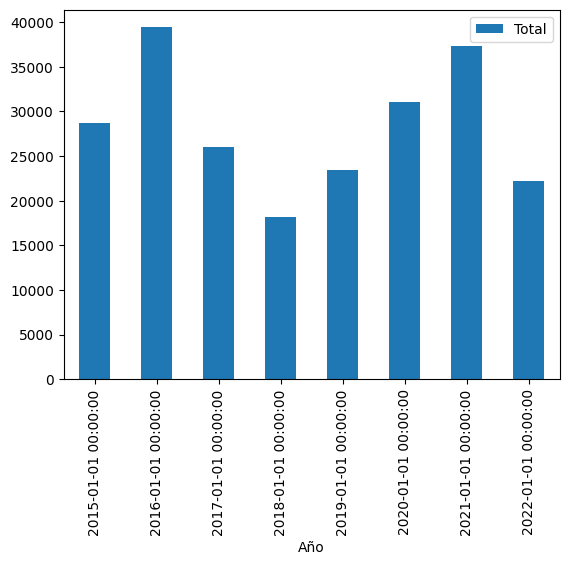

In [7]:
delit.plot.bar(x="Año",y="Total")

También se hizo una gráfica de barras con el total de delitos cometidos por tipo de delito en Sonora.

In [8]:
typed= dfson.groupby("Tipo de delito").sum()["Total"].reset_index().sort_values(by="Total", ascending=False)
        
typed

C:\Users\ghost\AppData\Local\Temp\ipykernel_32708\4138624242.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  typed= dfson.groupby("Tipo de delito").sum()["Total"].reset_index().sort_values(by="Total", ascending=False)


,Tipo de delito,Total
32,Robo,74903
39,Violencia familiar,31015
22,Lesiones,18436
21,Incumplimiento de obligaciones de asistencia f...,16025
8,Daño a la propiedad,15518
23,Narcomenudeo,14920
27,Otros delitos del Fuero Común,12508
18,Homicidio,10605
5,Amenazas,6758
17,Fraude,5068


<Figure size 1000x1000 with 0 Axes>

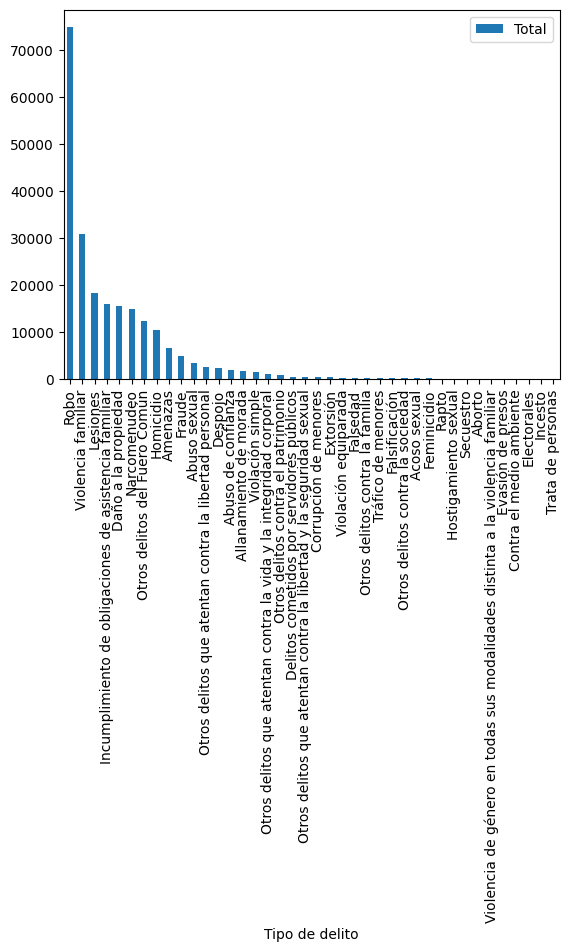

<Figure size 1000x1000 with 0 Axes>

In [9]:
typed.plot.bar(x="Tipo de delito",y="Total")
plt.figure(figsize=(10, 10))

# 4. Documentar su trabajo en formato libre pero de manera comprensiva.
Documentado [aquí](https://github.com/melrepa/ICDyM/tree/main/Parte%202).